In [16]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

#definining max column width
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [ ]:
#setting datasets

exped_df = pd.read_csv('exped.csv')
members_df = pd.read_csv('members.csv')
peaks_df = pd.read_csv('peaks.csv')
refer_df = pd.read_csv('refer.csv', encoding='windows-1252')
dictionary_df = pd.read_csv('himalayan_data_dictionary.csv')


C:\Users\admin\AppData\Local\Temp\ipykernel_12540\3899637794.py:3: DtypeWarning: Columns (8,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  exped_df = pd.read_csv('exped.csv')
C:\Users\admin\AppData\Local\Temp\ipykernel_12540\3899637794.py:4: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  members_df = pd.read_csv('members.csv')


In [ ]:
print(dictionary_df.shape)
dictionary_df

(165, 3)


,Table,Field,Description
0,peaks,NaN,NaN
1,peaks,peakid,Peak ID (primary key)
2,peaks,pkname,Foreign (common) name of the peak
3,peaks,pkname2,Local name of the peak
4,peaks,location,Location of the climbing area
5,peaks,heightm,Height (meters)
6,peaks,heightf,Height (feet)
7,peaks,himal,Mountain range or Himal (slightly broader than...
8,peaks,region,Broad mountain regions grouping several Himals...
9,peaks,open,The peak is on the Nepal government’s approved...


In [ ]:
print(exped_df.shape)
exped_df.head(3)

(11425, 65)


,expid,peakid,year,season,host,route1,route2,route3,route4,nation,leaders,sponsor,success1,success2,success3,success4,ascent1,ascent2,ascent3,ascent4,claimed,disputed,countries,approach,bcdate,smtdate,smttime,smtdays,totdays,termdate,termreason,termnote,highpoint,traverse,ski,parapente,camps,rope,totmembers,smtmembers,mdeaths,tothired,smthired,hdeaths,nohired,o2used,o2none,o2climb,o2descent,o2sleep,o2medical,o2taken,o2unkwn,othersmts,campsites,accidents,achievment,agency,comrte,stdrte,primrte,primmem,primref,primid,chksum
0,ANN260101,ANN2,1960,Spring,Nepal,NW Ridge-W Ridge,NaN,NaN,NaN,UK,J. O. M. Roberts,NaN,True,False,False,False,1st,NaN,NaN,NaN,False,False,"India, Nepal",Marshyangdi->Hongde->Sabje Khola,1960-03-15,1960-05-17,1530.0,63.0,NaN,NaN,Success (main peak),NaN,7937,False,False,False,6,0,10,2,0,9,1,0,False,True,False,True,False,True,False,False,False,Climbed Annapurna IV (ANN4-601-01),"BC(15/03,3350m),ABC(4575m),C1(5365m),C2(5800m)...",NaN,NaN,NaN,False,False,False,False,False,NaN,2442047
1,ANN269301,ANN2,1969,Autumn,Nepal,NW Ridge-W Ridge,NaN,NaN,NaN,Yugoslavia,Ales Kunaver,Mountaineering Club of Slovenia,True,False,False,False,2nd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Hongde->Sabje Khola,1969-09-25,1969-10-22,1800.0,27.0,31.0,1969-10-26,Success (main peak),NaN,7937,False,False,False,6,0,10,2,0,0,0,0,False,False,True,False,False,False,False,False,False,Climbed Annapurna IV (ANN4-693-02),"LowBC(25/09,3950m),BC(27/09,4650m),C1(27/09,53...",Draslar frostbitten hands and feet,NaN,NaN,False,False,False,False,False,NaN,2445501
2,ANN273101,ANN2,1973,Spring,Nepal,W Ridge-N Face,NaN,NaN,NaN,Japan,Yukio Shimamura,Sangaku Doshikai Annapurna II Expedition 1973,True,False,False,False,3rd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,1973-03-16,1973-05-06,2030.0,51.0,NaN,NaN,Success (main peak),NaN,7937,False,False,False,5,0,6,1,0,8,0,0,False,False,True,False,False,False,False,False,False,NaN,"BC(16/03,3300m),C1(21/03,4200m),C2(10/04,5000m...",NaN,NaN,NaN,False,False,False,False,False,NaN,2446797


In [ ]:
print(members_df.shape)
members_df.head(3)

(89000, 61)


,expid,membid,peakid,myear,mseason,fname,lname,sex,yob,citizen,status,residence,occupation,leader,deputy,bconly,nottobc,support,disabled,hired,sherpa,tibetan,msuccess,mclaimed,mdisputed,msolo,mtraverse,mski,mparapente,mspeed,mhighpt,mperhighpt,msmtdate1,msmtdate2,msmtdate3,msmttime1,msmttime2,msmttime3,mroute1,mroute2,mroute3,mascent1,mascent2,mascent3,mo2used,mo2none,mo2climb,mo2descent,mo2sleep,mo2medical,mo2note,death,deathdate,deathtime,deathtype,deathhgtm,deathclass,msmtbid,msmtterm,hcn,mchksum
0,AMAD01101,2,AMAD,2001,Spring,Rohan,Buckley,M,1972.0,Australia,Climber,"Sale, Victoria, Australia",Air force navigator,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,False,True,False,False,False,False,NaN,False,NaN,NaN,NaN,0,NaN,No summit bid,Did not climb or intent to summit,NaN,2439554
1,AMAD01101,1,AMAD,2001,Spring,Marc Cameron,Fairhead,M,1968.0,Australia,Leader,"Bridgewater, SA, Australia",Manager in Department of Defense,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6200.0,2001-04-11,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,NaN,NaN,NaN,0,NaN,Aborted at high camp,"Bad conditions (deep snow, avalanches, falling...",NaN,2438062
2,AMAD01101,3,AMAD,2001,Spring,Mark,Schroeder,M,1960.0,Australia,Climber,"Woolhara, NSW, Australia",Advertising general manager,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6200.0,2001-04-11,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,False,True,False,False,False,False,NaN,False,NaN,NaN,NaN,0,NaN,Aborted at high camp,"Bad conditions (deep snow, avalanches, falling...",NaN,2435183


In [ ]:
#Converting peakid to string in all dataframes

exped_df['expid'] = exped_df['expid'].astype(str)
members_df['expid'] = members_df['expid'].astype(str)


In [ ]:
#merging datasets
merged_df = exped_df.merge(members_df, on='expid', how='left')
print(merged_df.shape)
merged_df.head(4)

(89104, 125)


,expid,peakid_x,year,season,host,route1,route2,route3,route4,nation,leaders,sponsor,success1,success2,success3,success4,ascent1,ascent2,ascent3,ascent4,claimed,disputed,countries,approach,bcdate,smtdate,smttime,smtdays,totdays,termdate,termreason,termnote,highpoint,traverse,ski,parapente,camps,rope,totmembers,smtmembers,mdeaths,tothired,smthired,hdeaths,nohired,o2used,o2none,o2climb,o2descent,o2sleep,o2medical,o2taken,o2unkwn,othersmts,campsites,accidents,achievment,agency,comrte,stdrte,primrte,primmem,primref,primid,chksum,membid,peakid_y,myear,mseason,fname,lname,sex,yob,citizen,status,residence,occupation,leader,deputy,bconly,nottobc,support,disabled,hired,sherpa,tibetan,msuccess,mclaimed,mdisputed,msolo,mtraverse,mski,mparapente,mspeed,mhighpt,mperhighpt,msmtdate1,msmtdate2,msmtdate3,msmttime1,msmttime2,msmttime3,mroute1,mroute2,mroute3,mascent1,mascent2,mascent3,mo2used,mo2none,mo2climb,mo2descent,mo2sleep,mo2medical,mo2note,death,deathdate,deathtime,deathtype,deathhgtm,deathclass,msmtbid,msmtterm,hcn,mchksum
0,ANN260101,ANN2,1960,Spring,Nepal,NW Ridge-W Ridge,NaN,NaN,NaN,UK,J. O. M. Roberts,NaN,True,False,False,False,1st,NaN,NaN,NaN,False,False,"India, Nepal",Marshyangdi->Hongde->Sabje Khola,1960-03-15,1960-05-17,1530.0,63.0,NaN,NaN,Success (main peak),NaN,7937,False,False,False,6,0,10,2,0,9,1,0,False,True,False,True,False,True,False,False,False,Climbed Annapurna IV (ANN4-601-01),"BC(15/03,3350m),ABC(4575m),C1(5365m),C2(5800m)...",NaN,NaN,NaN,False,False,False,False,False,NaN,2442047,1.0,ANN2,1999.0,Spring,James Owen Merion,Roberts,M,1916.0,UK,Leader,Kathmandu,"Lt. Colonel, British Military Attache to Nepal",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,NaN,False,NaN,NaN,NaN,0.0,NaN,No summit bid,Route/camp preparation or rope fixing,NaN,2419236.0
1,ANN260101,ANN2,1960,Spring,Nepal,NW Ridge-W Ridge,NaN,NaN,NaN,UK,J. O. M. Roberts,NaN,True,False,False,False,1st,NaN,NaN,NaN,False,False,"India, Nepal",Marshyangdi->Hongde->Sabje Khola,1960-03-15,1960-05-17,1530.0,63.0,NaN,NaN,Success (main peak),NaN,7937,False,False,False,6,0,10,2,0,9,1,0,False,True,False,True,False,True,False,False,False,Climbed Annapurna IV (ANN4-601-01),"BC(15/03,3350m),ABC(4575m),C1(5365m),C2(5800m)...",NaN,NaN,NaN,False,False,False,False,False,NaN,2442047,4.0,ANN2,1999.0,Spring,Richard Henry,Grant,M,1927.0,UK,Climber,NaN,"Captain, British Royal Marines",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,7937.0,1960-05-17,NaN,NaN,1530.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,True,False,True,False,True,False,NaN,False,NaN,NaN,NaN,0.0,NaN,Successful summit bid,Success,NaN,-1929.0
2,ANN260101,ANN2,1960,Spring,Nepal,NW Ridge-W Ridge,NaN,NaN,NaN,UK,J. O. M. Roberts,NaN,True,False,False,False,1st,NaN,NaN,NaN,False,False,"India, Nepal",Marshyangdi->Hongde->Sabje Khola,1960-03-15,1960-05-17,1530.0,63.0,NaN,NaN,Success (main peak),NaN,7937,False,False,False,6,0,10,2,0,9,1,0,False,True,False,True,False,True,False,False,False,Climbed Annapurna IV (ANN4-601-01),"BC(15/03,3350m),ABC(4575m),C1(5365m),C2(5800m)...",NaN,NaN,NaN,False,False,False,False,False,NaN,2442047,3.0,ANN2,1999.0,Spring,William Albert (Bill),Crawshaw,M,1932.0,UK,Climber,NaN,"Captain, British Army",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7250.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,NaN,False,NaN,NaN,NaN,0.0,NaN,No summit bid,Route/camp preparation or rope fixing,NaN,-1908.0
3,ANN260101,ANN2,1960,Spring,Nepal,NW Ridge-W Ridge,NaN,NaN,NaN,UK,J. O. M. Roberts,NaN,True,False,False,False,1st,NaN,NaN,NaN,False,False,"India, Nepal",Marshyangdi->Hongde->Sabje Khola,1960-03-15,1960-05-17,1530.0,63.0,NaN,NaN,Success (main peak),NaN,7937,False,False,False,6,0,10,2,0,9,1,0,False,True,False,True,False,True,Fa

In [ ]:
#setting dateformat for merged_df as year-month-day
merged_df['bcdate'] = pd.to_datetime(merged_df['bcdate'], format='%Y-%m-%d', errors='coerce')
merged_df['smtdate'] = pd.to_datetime(merged_df['smtdate'], format='%Y-%m-%d', errors='coerce')


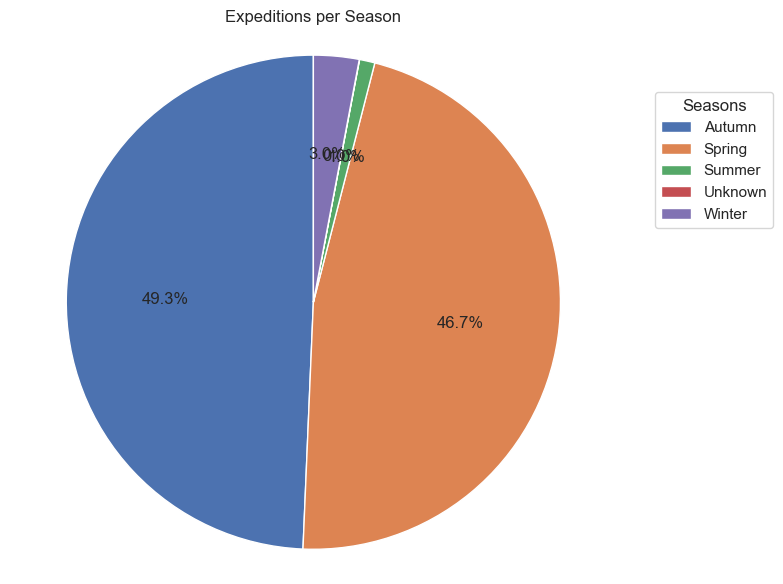

In [40]:
#Number of expeditions per Season

unique_expid = merged_df.drop_duplicates(subset='expid')
season_counts = unique_expid['season'].value_counts().sort_index()
# unique_expid.value_counts('season').sort_index() This line will not run
# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))  # Slightly wider for legend space

# Pie chart (no labels in the pie)
patches, texts, autotexts = plt.pie(
    season_counts,
    labels=None,  # Remove labels from the pie itself
    autopct='%1.1f%%',
    startangle=90
)

# Add a legend with season names
plt.legend(
    patches,
    season_counts.index,
    title="Seasons",
    bbox_to_anchor=(1.05, 0.9),  # Move to the side
    loc="upper left"
)

plt.title('Expeditions per Season')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
#Analyzing the merged dataset

#number of expeditions
num_expeditions = merged_df['expid'].nunique()
print(f"Number of expeditions: {num_expeditions}")


Number of expeditions: 11421


In [29]:
#Top10 approaches

top_approaches = merged_df['approach'].value_counts().head(10)
Count_of_deaths_by_ocurrances = merged_df['mdeaths'].value_counts().head(10)

In [22]:
#Plot Death vs Years

fig_deaths = px.bar(merged_df, x='year', y='mdeaths', title='Top 10 Deaths vs Year',
            labels={'x': 'Year', 'y': 'Number of Deaths'},
            color='mdeaths', color_continuous_scale=px.colors.sequential.Viridis)
fig_deaths.update_layout(bargap=0.1)    

fig_deaths.show()
